In [1]:
################################################################################
# All the libraries used & constant values
# -------------------------------------------------------------------------------
import numpy as np

import matplotlib.pyplot as plt

from astropy.table import QTable

from astropy.io import ascii

from scipy.optimize import minimize

from Rotation_Curve_Functions import v_co_Burket_nb,v_d, vel_h_Burket, vel_b, loglike_Bur_nb, nloglike_Bur_nb

import math

import statistics

import emcee 

import corner
################################################################################

################################################################################
# Physical Constants
c = 3E5 # k * m * s ^1
h = 1 # reduced hubble constant
H_0 =  100 * h # km * s^-1 * Mpc^-1
################################################################################

################################################################################
# Import the Master Table

DTable1 = QTable.read('Master_Table.txt',format='ascii.commented_header')
DTable2 = QTable.read('DRPall-master_file.txt',format='ascii.ecsv')
################################################################################

# 7443-12705

10.353951647911828
6.912622583739364
14.993290843440628
---------------------------------------------------
      fun: nan
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.08334842e+02,  2.95066231e+01, -1.68351512e+03, -1.35059952e-01])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 10
      nit: 0
     njev: 2
   status: 2
  success: False
        x: array([1.11539516e+01, 5.89733600e+00, 6.45350242e-03, 2.70314254e+01])


/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: divide by zero encountered in true_divide
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:147: RuntimeWarning: divide by zero encountered in true_divide
  vel2 = ((0.5) * G * Mdisk_kg * (r / Rd) ** 2 / (Rd * 3.08E16)) * bessel_component
/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:147: RuntimeWarning: divide by zero encountered in double_scalars
  vel2 = ((0.5) * G * Mdisk_kg * (r / Rd) ** 2 / (Rd * 3.08E16)) * bessel_component
/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 

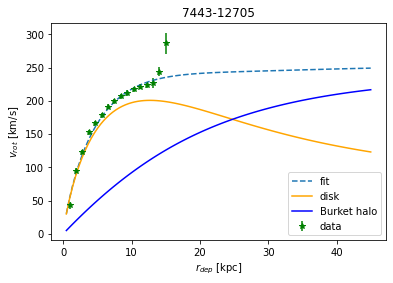

---------------------------------------------------
      fun: 39.25080807627482
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.05656644e+01, -2.77839478e+00,  9.99999990e+10, -2.98616929e-01])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 725
      nit: 19
     njev: 145
   status: 2
  success: False
        x: array([1.10585880e+01, 5.20668408e+00, 8.77638580e-03, 2.33801225e+01])


/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:354: RuntimeWarning: invalid value encountered in true_divide
  vel = np.sqrt(G * halo_mass_kg / (r * 3.0857E16))
/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:354: RuntimeWarning: invalid value encountered in true_divide
  vel = np.sqrt(G * halo_mass_kg / (r * 3.0857E16))


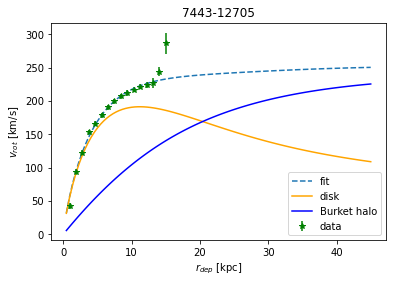

---------------------------------------------------
      fun: 1038.0950364676257
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01004992, -0.00343334,  0.12587407, -0.02019078])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 135
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([1.09885743e+01, 4.85227537e+00, 9.74754355e-03, 3.46718832e+01])


/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:354: RuntimeWarning: invalid value encountered in true_divide
  vel = np.sqrt(G * halo_mass_kg / (r * 3.0857E16))
/Users/richardzhang/Rotation_Curve_Functions.py:146: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))
/Users/richardzhang/Rotation_Curve_Functions.py:354: RuntimeWarning: invalid value encountered in true_divide
  vel = np.sqrt(G * halo_mass_kg / (r * 3.0857E16))


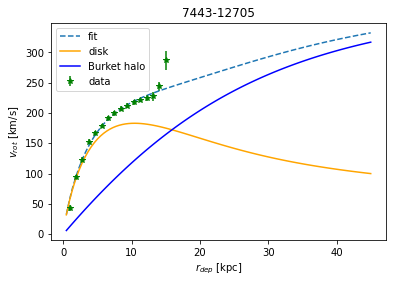

NameError: name 'bestfit_list' is not defined

In [2]:
################################################################################
# Get the Mass of stars & redshifts & angular resolution of r50
m = DTable1['NSA_Mstar'].data
z = DTable2['redshift'].data
r50_ang = DTable2['nsa_elpetro_th50_r'].data

# Obtain r50 for plate IFU 7443-12705
r50_spec = 0
z_spec = 0
for i in range(len(DTable2)):
    if DTable2['MaNGA_plate'][i] == 7443 and DTable2['MaNGA_IFU'][i] == 12705:
        r50_spec = r50_ang[i]
        z_spec = z[i]

# Obtain stellar mass of 7443-12705
m_spec = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        m_spec = m[i]
print(np.log10(m_spec))

#  Calculate the recession velocity for 7443-12705
v_rec = z_spec * c # km/s

# Using Hubble's Law to calculate distance [kpc] for 7443-12705
d = v_rec/H_0 # Mpc
d *= 1E3 # kpc

# Using Small Angle Formula to calculate the actual value of r50 [kpc] for 7443-12705
theta = r50_spec/206265 # radian
r50 = theta * d # kpc
print(r50)
################################################################################

################################################################################
# Import 7443-12705 data
galaxy_ID = '7443-12705'

rot_curve_data_filename = galaxy_ID + '_rot_curve_data.txt'

DTable_spec = QTable.read(rot_curve_data_filename, format='ascii.ecsv')

r = DTable_spec['deprojected_distance'].data
print(max(np.array(r)))
av = DTable_spec['rot_vel_avg'].data
av_err = DTable_spec['rot_vel_avg_error'].data
################################################################################

################################################################################
# Bounds
param_bounds = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0, 20],  # Disk radius [kpc]
                [0, 0.01],  # Halo density [Msun/pc^2]
                [0, 100]]  # Halo radius [kpc]
################################################################################

################################################################################
# Only 2 parameters

logM = np.log10(m_spec) + 0.8
r_disk = 0.8*r50_spec
#rho_dc = np.linspace(0.0001,0.01,20)
#r_h = np.linspace(0.1*r50,5*r50,10) # initial guesses of r_h in terms of r50
rho_dc =[0.006453502415458937,0.008778381642512078,0.00977596618357488]
r_halo = [27.0314253647587,23.32767286390475,34.56575415995706]

'''
rho_good = []
rho_good_initial = []
rhalo_good = []
rhalo_good_initial = []
'''

'''
# Variables for bounds
rho_max = max(param_bounds[2])
rho_min = min(param_bounds[2])
rhalo_max = max(param_bounds[3])
rhalo_min = min(param_bounds[3])
'''

# chi2 values for the fit
chi_square = []
# bestfit solutions
bestfit_sol = []
for i in range(len(rho_dc)):
    # Fit
    p0 = [logM, r_disk, rho_dc[i], r_halo[i]]
    bestfit_av = minimize(nloglike_Bur_nb, p0, args=(r, av, av_err, 250), bounds=param_bounds)
    print('---------------------------------------------------')
    print(bestfit_av)
    bestfit_sol.append(bestfit_av.x)
    if max(list(r)) < r_disk:
        r_plot = np.linspace(0, 3 * bestfit_av.x[1], 100)
    else:
        r_plot = np.linspace(0, 3 * max(list(r)), 100)
        plt.figure()
        plt.errorbar(r, av, yerr=av_err, fmt='g*', label='data')
        plt.plot(r_plot, v_co_Burket_nb(np.array(r_plot), bestfit_av.x), '--', label='fit')
        plt.plot(r_plot, v_d(np.array(r_plot) * 1000, 10 ** bestfit_av.x[0], bestfit_av.x[1] * 1000),
                    color='orange',
                    label='disk')
        plt.plot(r_plot, vel_h_Burket(np.array(r_plot) * 1000, bestfit_av.x[2], bestfit_av.x[3] * 1000),
                    color='blue',
                    label='Burket halo')
        plt.legend()
        plt.xlabel('$r_{dep}$ [kpc]')
        plt.ylabel('$v_{rot}$ [km/s]')
        plt.title('7443-12705')
        plt.show()


for i in range(len(bestfit_sol)):
    chi_square_av_Bur = np.zeros(len(av))
    for j in range(len(av)):
        chi_square_av_Bur[j] = ((np.array(av)[j] - v_co_Burket_nb(np.array(r), bestfit_list[i])[j])/ (av_err)[j])**2
    chi_square_av_Bur = np.sum(chi_square_av_Bur)/(len(av)-4)
    chi_square.append(chi_square_av_Bur)
print(chi_square)
bestfit_sol



# MCMC

In [9]:
def log_prior(params):
    logM,r_d,rho_h,r_h = params
    if 7 < logM < 13 and 0 < r_d < 10 and 1e-5 < rho_h < 1 and 0 < r_h <100:
        return 0.0
    return -np.inf

In [10]:
def log_prob(params,r, v, v_err):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglike_Bur_nb(params, r, v, v_err, 270)

In [11]:
np.array(r)

array([ 0.93708068,  1.87416136,  2.81124203,  3.74832271,  4.68540339,
        5.62248407,  6.55956474,  7.49664542,  8.4337261 ,  9.37080678,
       10.30788745, 11.24496813, 12.18204881, 13.11912949, 14.05621017,
       14.99329084])

In [12]:
np.array(r[:len(r)-2])

array([ 0.93708068,  1.87416136,  2.81124203,  3.74832271,  4.68540339,
        5.62248407,  6.55956474,  7.49664542,  8.4337261 ,  9.37080678,
       10.30788745, 11.24496813, 12.18204881, 13.11912949])

In [13]:
# Boundaries 
M_disk_low = np.log10(m_spec) - 1
M_disk_high = np.log10(m_spec) + 1
R_disk_low = 0.8*r50 - 1
R_disk_high = 0.8*r50 - 1
rho_halo_low = 1e-2
rho_halo_high = 1e-3
R_halo_low = 5
R_halo_high = 150

In [14]:
pos = np.random.uniform(low=[M_disk_low,R_disk_low,rho_halo_low,R_halo_low], high=[M_disk_high,R_disk_high,rho_halo_high,R_halo_high], size=(64,4))
nwalkers, ndim = pos.shape

bad_sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=(r[:len(r)-2], av[:len(r)-2], av_err[:len(r)-2]))
bad_sampler.run_mcmc(pos, 50000, progress=True)

100%|██████████| 50000/50000 [28:46<00:00, 28.96it/s]


State([[9.51396134e+00 4.53009807e+00 1.72010590e-01 4.88696996e+00]
 [1.05631715e+01 4.53009807e+00 8.38391278e-02 6.52366941e+00]
 [8.63331834e+00 4.53009807e+00 1.71795171e-01 5.06228313e+00]
 [9.71728015e+00 4.53009807e+00 1.55921962e-01 5.20681826e+00]
 [7.28424638e+00 4.53009807e+00 1.89455107e-01 4.65648844e+00]
 [1.00539260e+01 4.53009807e+00 1.47164118e-01 5.26134070e+00]
 [1.06648536e+01 4.53009807e+00 7.18479989e-02 6.68081292e+00]
 [1.08848542e+01 4.53009807e+00 2.14604775e-02 1.26019948e+01]
 [9.94280712e+00 4.53009807e+00 1.56981321e-01 5.07919859e+00]
 [9.60441812e+00 4.53009807e+00 1.72900523e-01 4.92695724e+00]
 [1.01732575e+01 4.53009807e+00 1.53334970e-01 4.96791532e+00]
 [1.05365751e+01 4.53009807e+00 9.42126946e-02 6.17806505e+00]
 [7.99671027e+00 4.53009807e+00 1.75383010e-01 4.89551970e+00]
 [1.03977549e+01 4.53009807e+00 1.24795191e-01 5.33404640e+00]
 [8.99673451e+00 4.53009807e+00 1.79094783e-01 4.84738548e+00]
 [7.98388503e+00 4.53009807e+00 1.92372218e-01 4.

<ipython-input-15-f938436dd50d>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


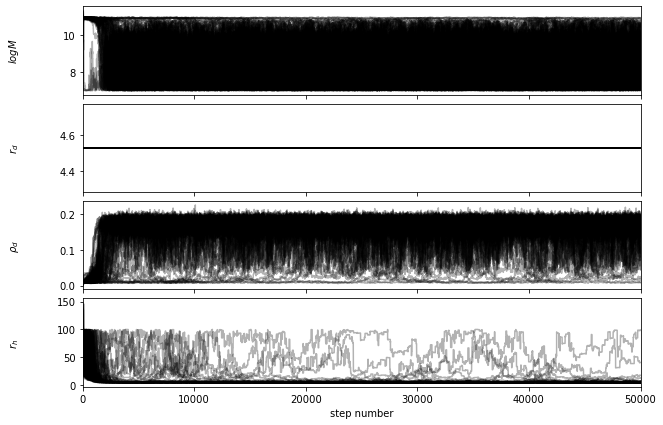

In [15]:
fig, axes = plt.subplots(4,1, figsize=(10, 7), sharex=True,
                         gridspec_kw={'hspace':0.1})
bad_samples = bad_sampler.get_chain()

labels = ['$logM$','$r_{d}$', r'$\rho_d$','$r_h$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(bad_samples[:50000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,50000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

axes[-1].set_xlabel('step number')
fig.tight_layout()

In [16]:
good_walkers = bad_sampler.acceptance_fraction > 0

<ipython-input-17-2775dadbd187>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


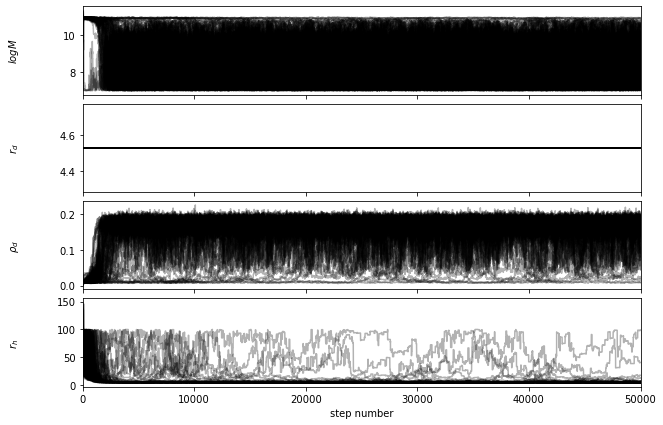

In [17]:
fig, axes = plt.subplots(4,1, figsize=(10, 7), sharex=True,
                         gridspec_kw={'hspace':0.1})
bad_samples = bad_sampler.get_chain()[:,good_walkers,:]

labels = ['$logM$','$r_{d}$', r'$\rho_d$','$r_h$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(bad_samples[:50000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,50000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

axes[-1].set_xlabel('step number')
fig.tight_layout()

In [18]:
bad_samples = bad_sampler.get_chain(discard=100)[:,good_walkers,:]
ns, nw, nd = bad_samples.shape
flat_bad_samples = bad_samples.reshape(ns*nw, nd)
flat_bad_samples.shape

(3193600, 4)

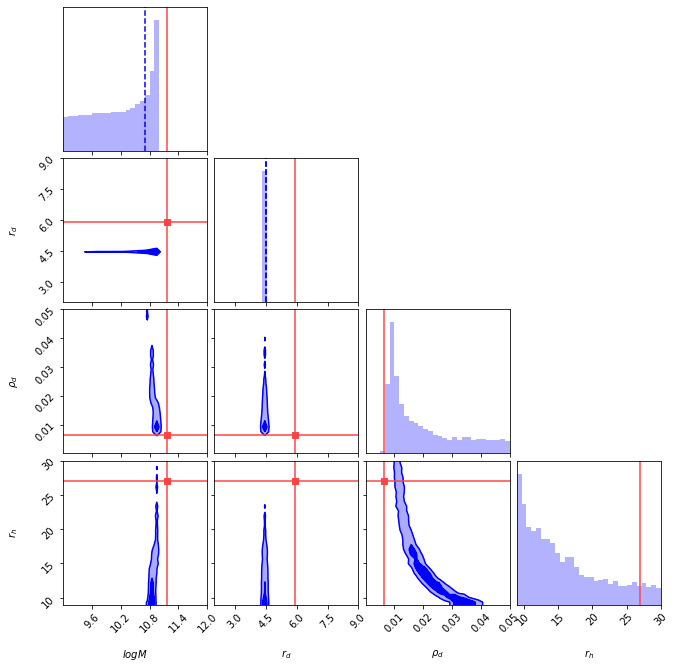

In [19]:
'''
corner.corner(flat_samples, labels=labels,
                    range=[(9,12), (2.5,7.8), (0.00001,0.05),(10.1,19.5),(0.3,0.8),(0.25,0.75),(30,37),(30,37)], bins=30, #smooth=1,
#                     truths=[a_true, b_true, np.log(f_true)], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), #quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);
'''

corner.corner(flat_bad_samples, labels=labels,
                    range=[(9,12), (2,9), (0.00001,0.05),(9,30)], bins=30, #smooth=1,
                    truths=bestfit_sol[0], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);

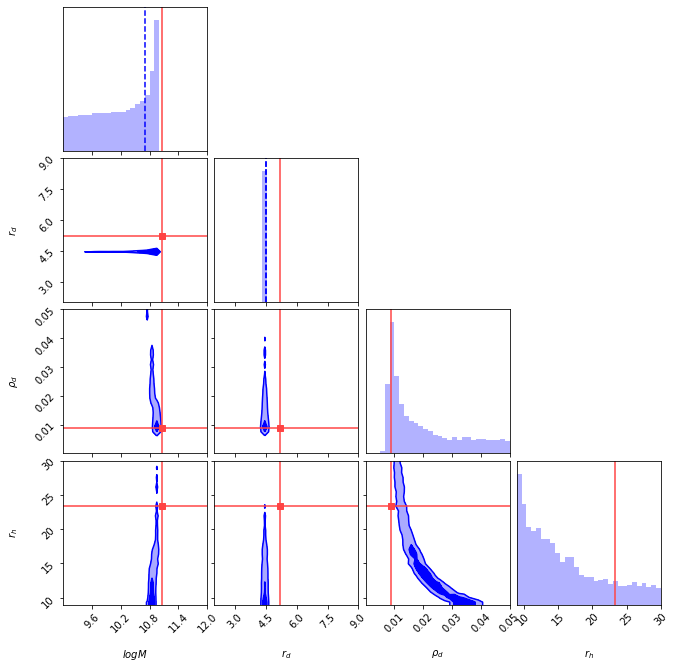

In [20]:
'''
corner.corner(flat_samples, labels=labels,
                    range=[(9,12), (2.5,7.8), (0.00001,0.05),(10.1,19.5),(0.3,0.8),(0.25,0.75),(30,37),(30,37)], bins=30, #smooth=1,
#                     truths=[a_true, b_true, np.log(f_true)], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), #quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);
'''

corner.corner(flat_bad_samples, labels=labels,
                    range=[(9,12), (2,9), (0.00001,0.05),(9,30)], bins=30, #smooth=1,
                    truths=bestfit_sol[1], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);

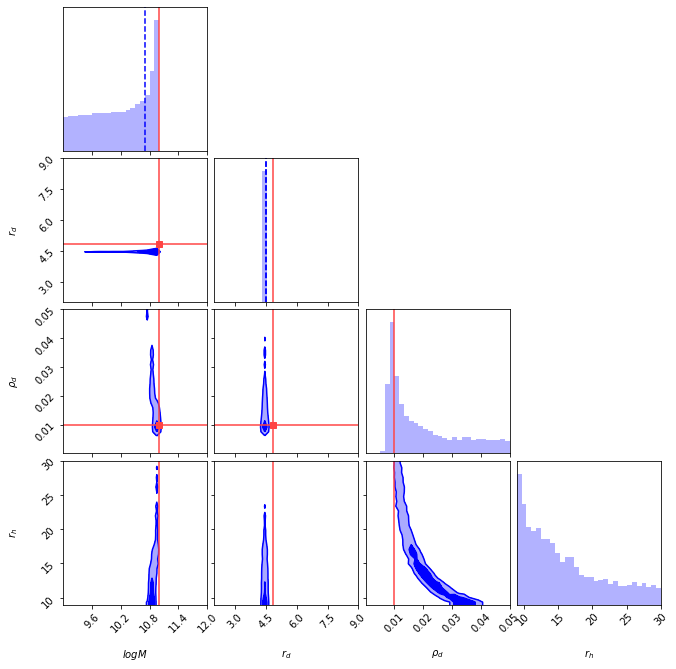

In [21]:
'''
corner.corner(flat_samples, labels=labels,
                    range=[(9,12), (2.5,7.8), (0.00001,0.05),(10.1,19.5),(0.3,0.8),(0.25,0.75),(30,37),(30,37)], bins=30, #smooth=1,
#                     truths=[a_true, b_true, np.log(f_true)], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), #quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);
'''

corner.corner(flat_bad_samples, labels=labels,
                    range=[(9,12), (2,9), (0.00001,0.05),(9,30)], bins=30, #smooth=1,
                    truths=bestfit_sol[2], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);